<a href="https://colab.research.google.com/github/techman0256/Data_Mining_CP3/blob/main/CP3_WorldCupPrediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [91]:
data = pd.read_csv('worldcup2023.csv')

In [92]:
data.columns

Index(['Unnamed: 0', 'match_id', 'season', 'start_date', 'venue', 'innings',
       'ball', 'batting_team', 'bowling_team', 'striker', 'non_striker',
       'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes',
       'legbyes', 'penalty', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed'],
      dtype='object')

Performing Data Cleaning.

In [93]:
data.isna().sum()

Unnamed: 0                    0
match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     21999
noballs                   22529
byes                      22547
legbyes                   22414
penalty                   22578
wicket_type               21938
player_dismissed          21938
other_wicket_type         22578
other_player_dismissed    22578
dtype: int64

In [94]:
#filling na values
data[["wides", "noballs", "byes", "legbyes", "penalty"]] = data[["wides", "noballs", "byes", "legbyes", "penalty"]].fillna(0)

In [95]:
data.wicket_type.fillna("no wicket", inplace=True)
data.player_dismissed.fillna("no wicket", inplace=True)

In [96]:
data[["other_wicket_type", "other_player_dismissed"]] = data[["other_wicket_type", "other_player_dismissed"]].fillna("no dismissal")

In [97]:
data.isna().sum()

Unnamed: 0                0
match_id                  0
season                    0
start_date                0
venue                     0
innings                   0
ball                      0
batting_team              0
bowling_team              0
striker                   0
non_striker               0
bowler                    0
runs_off_bat              0
extras                    0
wides                     0
noballs                   0
byes                      0
legbyes                   0
penalty                   0
wicket_type               0
player_dismissed          0
other_wicket_type         0
other_player_dismissed    0
dtype: int64

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              22579 non-null  int64  
 1   match_id                22579 non-null  int64  
 2   season                  22579 non-null  object 
 3   start_date              22579 non-null  object 
 4   venue                   22579 non-null  object 
 5   innings                 22579 non-null  int64  
 6   ball                    22579 non-null  float64
 7   batting_team            22579 non-null  object 
 8   bowling_team            22579 non-null  object 
 9   striker                 22579 non-null  object 
 10  non_striker             22579 non-null  object 
 11  bowler                  22579 non-null  object 
 12  runs_off_bat            22579 non-null  int64  
 13  extras                  22579 non-null  int64  
 14  wides                   22579 non-null

In [100]:
data['match_number'] = data['match_id'].rank(method='dense').astype(int)

In [101]:
#Calculate the total runs scored on each ball
data["total_runs"] = data["runs_off_bat"] + data["extras"]

In [102]:
#creating a wicket column to get boolean of wicket fall
data["wicket"] = data["player_dismissed"].apply(lambda x: 1 if isinstance(x, str) else 0)

In [103]:
#Creating two columns of Over and Ball numbers
data["ball"] = data["ball"].astype(str)
data[["over", "ball_num"]] = data["ball"].str.split(".", expand=True).astype(int)
data["ball"] = data["ball"].astype(np.float64)
data["over"] = data["over"] + 1
data["ball_left"] = 306 - (data["over"]*6 + data["ball_num"])

In [104]:
#creating total runs column to calculate runs on each ball incusive of extras
data["total_runs"] = data["runs_off_bat"] + data["extras"]

In [106]:
data["cumulative_runs"] = data.groupby(["match_id", "innings"])["total_runs"].cumsum()

In [107]:
data["run_rate"] = data.groupby(["match_id","innings"]).apply(lambda x: (x["cumulative_runs"]*6)/(300-x["ball_left"])).reset_index(level=[0,1], drop=True)

Analysing a particular match.

In [19]:
df_aus_afg = data[data['start_date'] =='2023-11-07']

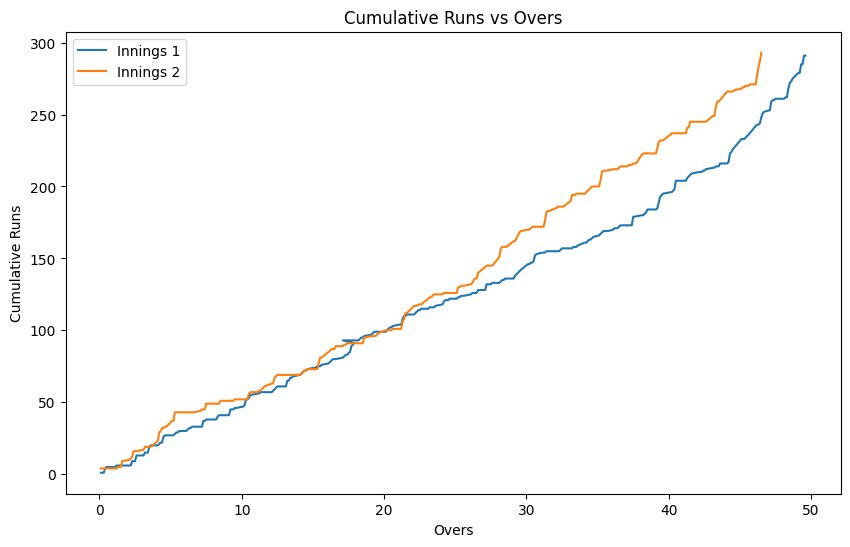

In [20]:
# Filter DataFrame for innings 1 and innings 2
df_innings1 = df_aus_afg[df_aus_afg['innings'] == 1]
df_innings2 = df_aus_afg[df_aus_afg['innings'] == 2]

# Plot cumulative runs vs overs for innings 1
fig = plt.figure(figsize=(10,6))
plt.plot(df_innings1['ball'], df_innings1['cumulative_runs'], label='Innings 1')

# Plot cumulative runs vs overs for innings 2
plt.plot(df_innings2['ball'], df_innings2['cumulative_runs'], label='Innings 2')

# Add labels and title
plt.xlabel('Overs')
plt.ylabel('Cumulative Runs')
plt.title('Cumulative Runs vs Overs')

# Add legend
plt.legend()
plt.show()

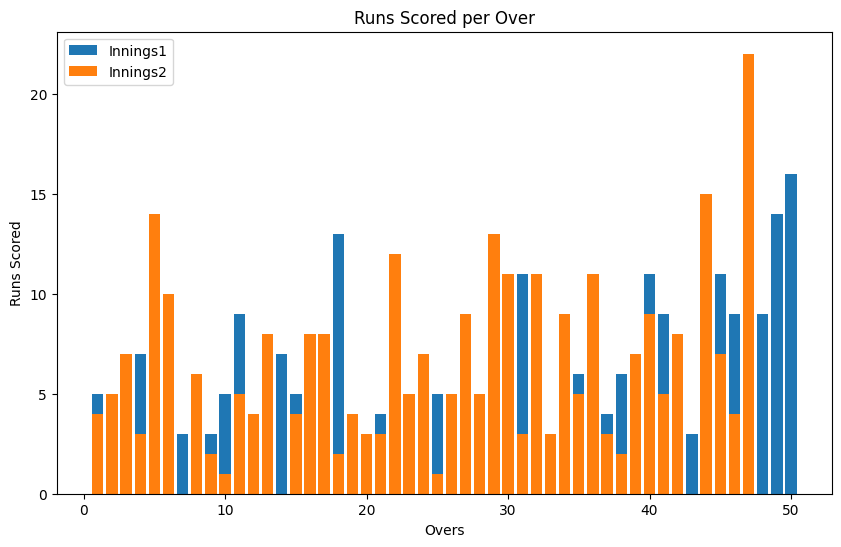

In [21]:
# Group by 'overs' and calculate the sum of 'total_runs' for each over

fig = plt.figure(figsize=(10,6))
runs_per_over_innings1 = df_innings1.groupby('over')['total_runs'].sum()
runs_per_over_innings2 = df_innings2.groupby('over')['total_runs'].sum()

# Plotting the bar graph

plt.bar(runs_per_over_innings1.index, runs_per_over_innings1, label='Innings1')
plt.bar(runs_per_over_innings2.index, runs_per_over_innings2, label='Innings2')

# Add labels and title
plt.xlabel('Overs')
plt.ylabel('Runs Scored')
plt.title('Runs Scored per Over')

plt.legend()
# Show the plot
plt.show()

Average Runs Scored at each venue

In [22]:
# Taking the venues of Semi-Finals and Finals
total_runs_per_venue_per_match = data.groupby(['match_id', 'venue', 'innings'])['total_runs'].sum().reset_index()
selected_venues = ['Narendra Modi Stadium, Ahmedabad', 'Wankhede Stadium, Mumbai', 'Eden Gardens, Kolkata']
filtered_df = total_runs_per_venue_per_match[total_runs_per_venue_per_match['venue'].isin(selected_venues)]
print(filtered_df)

    match_id                             venue  innings  total_runs
0    1384392  Narendra Modi Stadium, Ahmedabad        1         282
1    1384392  Narendra Modi Stadium, Ahmedabad        2         283
22   1384403  Narendra Modi Stadium, Ahmedabad        1         191
23   1384403  Narendra Modi Stadium, Ahmedabad        2         192
38   1384411          Wankhede Stadium, Mumbai        1         399
39   1384411          Wankhede Stadium, Mumbai        2         170
44   1384414          Wankhede Stadium, Mumbai        1         382
45   1384414          Wankhede Stadium, Mumbai        2         233
54   1384419             Eden Gardens, Kolkata        1         229
55   1384419             Eden Gardens, Kolkata        2         142
60   1384422             Eden Gardens, Kolkata        1         204
61   1384422             Eden Gardens, Kolkata        2         205
64   1384424          Wankhede Stadium, Mumbai        1         357
65   1384424          Wankhede Stadium, Mumbai  

In [23]:
average_runs_per_venue = filtered_df.groupby(['venue', 'innings'])['total_runs'].mean().reset_index()
print(average_runs_per_venue)

                              venue  innings  total_runs
0             Eden Gardens, Kolkata        1  253.000000
1             Eden Gardens, Kolkata        2  143.333333
2  Narendra Modi Stadium, Ahmedabad        1  250.750000
3  Narendra Modi Stadium, Ahmedabad        2  243.750000
4          Wankhede Stadium, Mumbai        1  357.250000
5          Wankhede Stadium, Mumbai        2  187.750000


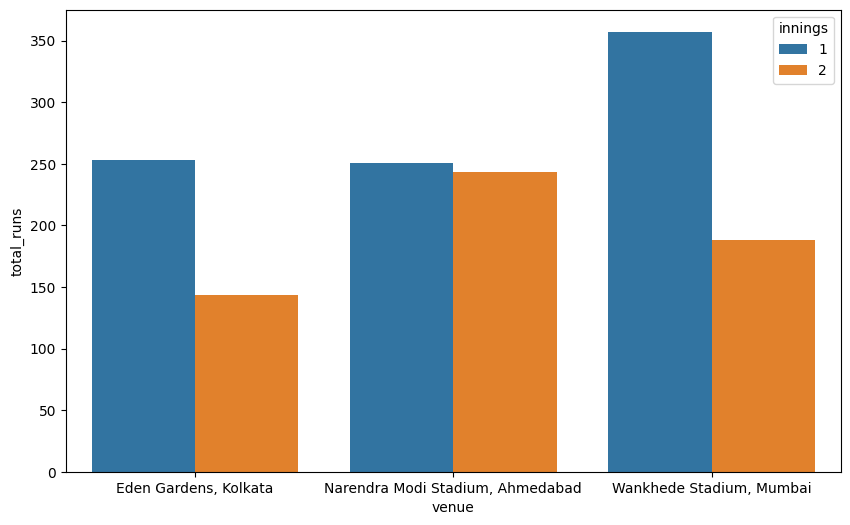

In [24]:
fig = plt.figure(figsize=(10,6))
sns.barplot(average_runs_per_venue, x='venue', y='total_runs', hue='innings')
plt.show()

So, when playing at Mumbai or Kolkata the team batting first has a high chance to win the game.

In [ ]:
# Take data of the match between the Semi-Finalist.


Analysis of Inida vs New-Zealand for the Semi-Final-1

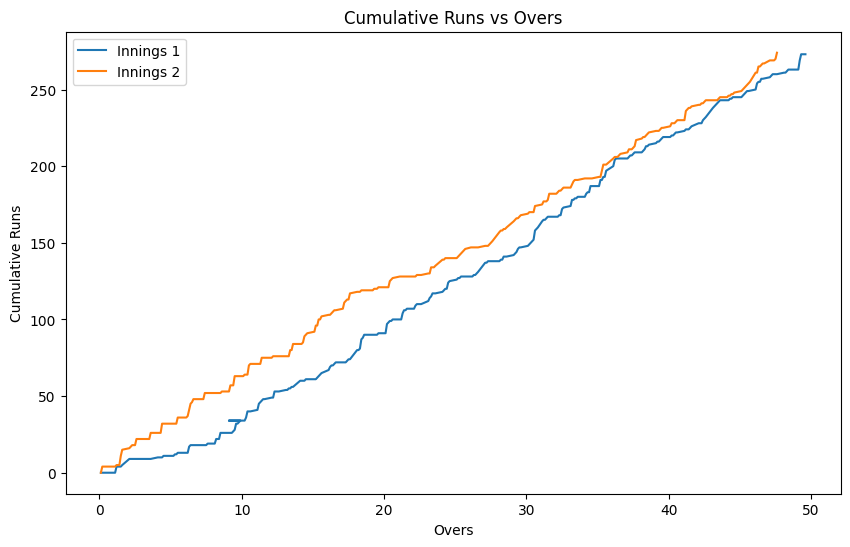

In [25]:
df_ind_nz = data[data['start_date'] =='2023-10-22']
# Filter DataFrame for innings 1 and innings 2
df_innings1 = df_ind_nz[df_ind_nz['innings'] == 1]
df_innings2 = df_ind_nz[df_ind_nz['innings'] == 2]

# Plot cumulative runs vs overs for innings 1
fig = plt.figure(figsize=(10,6))
plt.plot(df_innings1['ball'], df_innings1['cumulative_runs'], label='Innings 1')

# Plot cumulative runs vs overs for innings 2
plt.plot(df_innings2['ball'], df_innings2['cumulative_runs'], label='Innings 2')

# Add labels and title
plt.xlabel('Overs')
plt.ylabel('Cumulative Runs')
plt.title('Cumulative Runs vs Overs')

# Add legend
plt.legend()
plt.show()

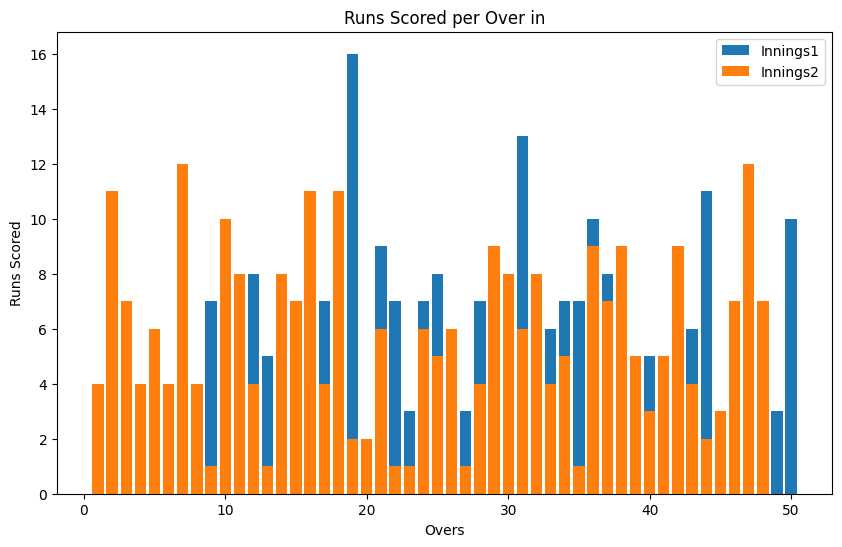

In [26]:
fig = plt.figure(figsize=(10,6))
runs_per_over_innings1 = df_innings1.groupby('over')['total_runs'].sum()
runs_per_over_innings2 = df_innings2.groupby('over')['total_runs'].sum()

# Plotting the bar graph

plt.bar(runs_per_over_innings1.index, runs_per_over_innings1, label='Innings1')
plt.bar(runs_per_over_innings2.index, runs_per_over_innings2, label='Innings2')

# Add labels and title
plt.xlabel('Overs')
plt.ylabel('Runs Scored')
plt.title('Runs Scored per Over in')

plt.legend()
# Show the plot
plt.show()

Analysis of Australia vs South-Africa for the Semi-Final-2

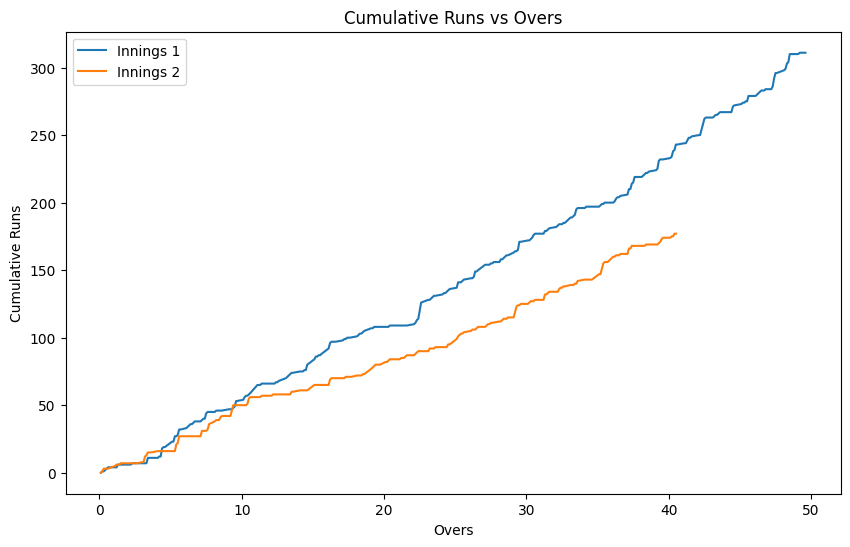

In [27]:
df_aus_sa = data[data['start_date'] =='2023-10-12']
# Filter DataFrame for innings 1 and innings 2
df_innings1 = df_aus_sa[df_aus_sa['innings'] == 1]
df_innings2 = df_aus_sa[df_aus_sa['innings'] == 2]

# Plot cumulative runs vs overs for innings 1
fig = plt.figure(figsize=(10,6))
plt.plot(df_innings1['ball'], df_innings1['cumulative_runs'], label='Innings 1')

# Plot cumulative runs vs overs for innings 2
plt.plot(df_innings2['ball'], df_innings2['cumulative_runs'], label='Innings 2')

# Add labels and title
plt.xlabel('Overs')
plt.ylabel('Cumulative Runs')
plt.title('Cumulative Runs vs Overs')

# Add legend
plt.legend()
plt.show()

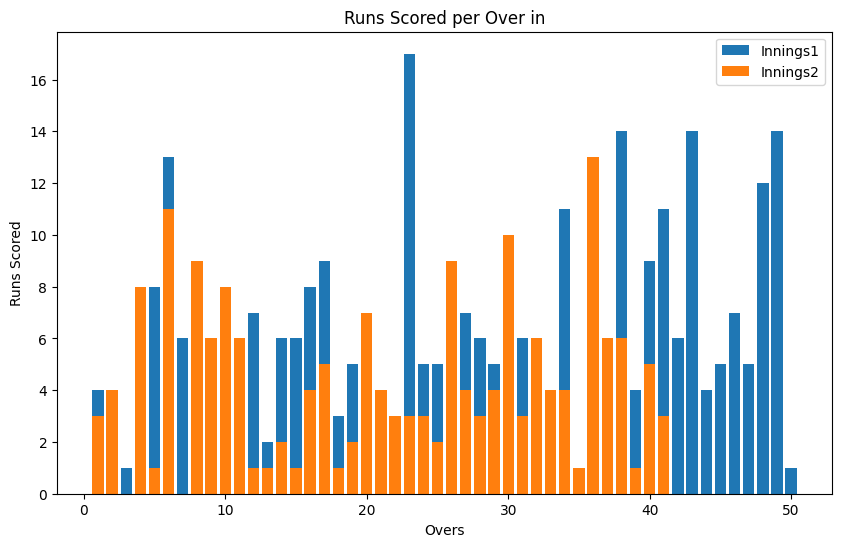

In [28]:
fig = plt.figure(figsize=(10,6))
runs_per_over_innings1 = df_innings1.groupby('over')['total_runs'].sum()
runs_per_over_innings2 = df_innings2.groupby('over')['total_runs'].sum()

# Plotting the bar graph

plt.bar(runs_per_over_innings1.index, runs_per_over_innings1, label='Innings1')
plt.bar(runs_per_over_innings2.index, runs_per_over_innings2, label='Innings2')

# Add labels and title
plt.xlabel('Overs')
plt.ylabel('Runs Scored')
plt.title('Runs Scored per Over in')

plt.legend()
# Show the plot
plt.show()

Getting Top-10 Bowlers of the Tournament till now

In [29]:
wickets_df = data[data['wicket_type']!="no wicket"]

# Group by bowler and count the number of wickets
wickets_count = wickets_df['bowler'].value_counts().reset_index()
wickets_count.columns = ['Bowler', 'Wickets']

# Sort the DataFrame by the number of wickets in descending order
wickets_count = wickets_count.sort_values(by='Wickets', ascending=False)

# Display the top 10 bowlers
top_10_bowlers = wickets_count.head(10)
print(top_10_bowlers)

                 Bowler  Wickets
0          D Madushanka       22
1               A Zampa       20
2             G Coetzee       18
3        Mohammed Shami       17
4              M Jansen       17
5   Shaheen Shah Afridi       16
6            MJ Santner       16
7              TA Boult       15
8             JJ Bumrah       15
10            RA Jadeja       14


Analysing the Bowling Performance of the Semi-Finalists

In [30]:
# Get the runs conceded by Team India in all its matches
filtered_df = data[(data['bowling_team']=='India') | (data['bowling_team']=='New Zealand')]
runs_conceded_ind_nz = filtered_df.groupby(['match_id', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index()
print(runs_conceded_ind_nz)

    match_id  batting_team bowling_team  total_runs
0    1384392       England  New Zealand         282
1    1384396     Australia        India         199
2    1384397   Netherlands  New Zealand         223
3    1384400   Afghanistan        India         272
4    1384402    Bangladesh  New Zealand         245
5    1384403      Pakistan        India         191
6    1384407   Afghanistan  New Zealand         139
7    1384408    Bangladesh        India         256
8    1384412         India  New Zealand         274
9    1384412   New Zealand        India         273
10   1384418     Australia  New Zealand         388
11   1384420       England        India         129
12   1384423  South Africa  New Zealand         357
13   1384424     Sri Lanka        India          55
14   1384426      Pakistan  New Zealand         200
15   1384428  South Africa        India          83
16   1384432     Sri Lanka  New Zealand         171


In [ ]:
# Getting the average runs conceded by Team India in all the matches
avg_runs_conceded = runs_conceded_ind_nz.groupby('bowling_team')['total_runs'].mean().reset_index()
print(avg_runs_conceded)


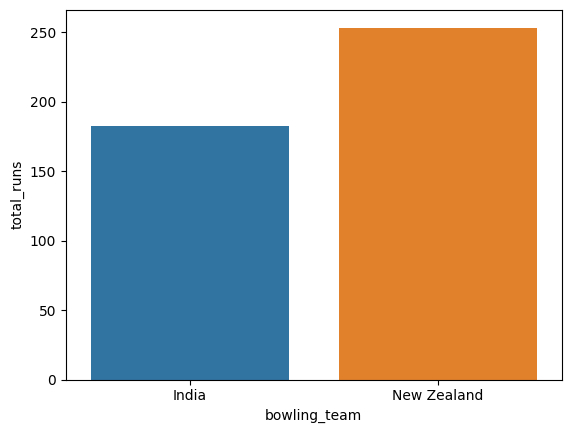

In [32]:
# fig = plt.figure(figsize=(6,6))
sns.barplot(avg_runs_conceded, x='bowling_team', y='total_runs')
plt.show()